Analytic solutions to single-layer compressible vortical flow pressure/density tendency in polar coords with radial flow proportional to radial pressure gradient: 

$P =  P_{e} - P_\Delta$

$P_\Delta =P_{min}e^{\frac{-r^2}{2r_{m}^2}}$ 

$V_r = -a \frac{dP}{dr}$

$\frac{dP}{dt} = -V_r \frac{dP}{dr} - P \frac{dV_r}{dr} - \frac{PV_r}{r} =$ adv + div + geo

$\frac{dP_\Delta}{dt}  = \frac{-a}{r_m^2} \left[\frac{r^2}{r_m^2}P_\Delta^2 + (1-\frac{r^2}{r_m^2}) (P_e - P_\Delta)P_\Delta + (P_e - P_\Delta)P_\Delta\right]$

$ \left.\frac{dP_\Delta}{dt}\right|_{r=0} = \frac{-2aP_\Delta}{r_m^2}(P_e-P_\Delta)$

$P_\Delta(t)=P_e\left[1+\left(\frac{P_e}{P_0}-1\right)e^{kt}\right]^{-1} ,  k=\frac{2aP_e}{r_m^2}$

$t_{1/2}=\frac{r_m^2}{2aP_e}\ln{\left(1+\frac{P_e}{P_e-P_0}\right)}$

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

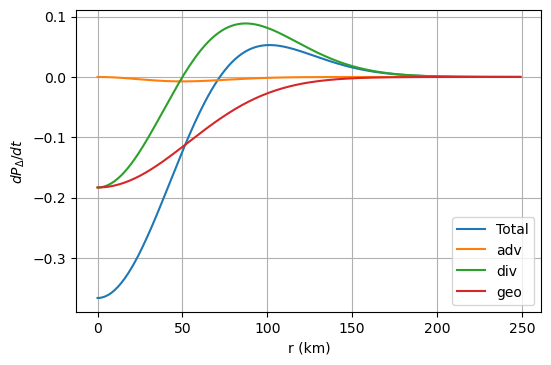

In [3]:
a=0.5
rmax=50000
r=np.arange(0,250000,1000)
rkm=r/1000

Pe=101600
Pdmax=10000
Pd=Pdmax*np.exp(-r**2/(2*rmax**2))

adv=-a*r**2/rmax**4*Pd**2
div=-a/rmax**2*(1-r**2/rmax**2)*(Pe-Pd)*Pd
geo=-a/rmax**2*(Pe-Pd)*Pd

fig,ax=plt.subplots(1,1,dpi=100)
ax.plot(rkm,adv+div+geo)
ax.plot(rkm,adv)
ax.plot(rkm,div)
ax.plot(rkm,geo)
ax.grid(True)
ax.set_xlabel('r (km)')
ax.set_ylabel('$dP_\Delta/dt$')
ax.legend(('Total','adv','div','geo'));

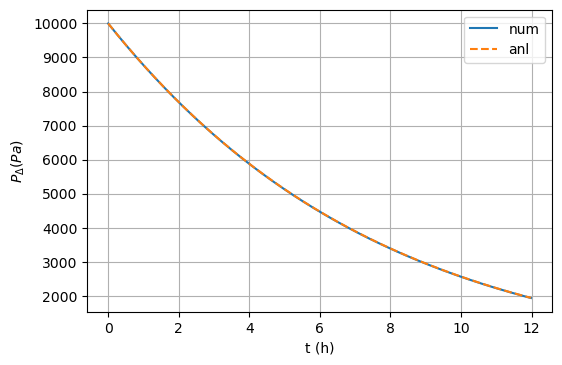

In [4]:
dt=60
a=0.5
rmax=50000
Pe=100000
Pd=[10000]

# numerical solution
for x in range(0,12*60-1):
  dPdt=-2*a/rmax**2*(Pe-Pd[-1])*Pd[-1]
  Pd.append(Pd[-1]+dPdt*dt)
t=np.arange(0,12*60)*dt
thr=t/(60*60)

# analytic solution
Pda=Pe/((Pe/Pdmax-1)*np.exp(2*Pe*a*t/rmax**2)+1)

fig,ax=plt.subplots(1,1,dpi=100)
ax.plot(thr,Pd)
ax.plot(thr,Pda,linestyle='--')
ax.grid(True)
ax.set_xlabel('t (h)')
ax.set_ylabel('$P_\Delta (Pa)$')
ax.legend(('num','anl'));

<ipython-input-73-d22f50b25743>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc=ax.pcolormesh(rms/1000,P0s/100,th/(60*60))


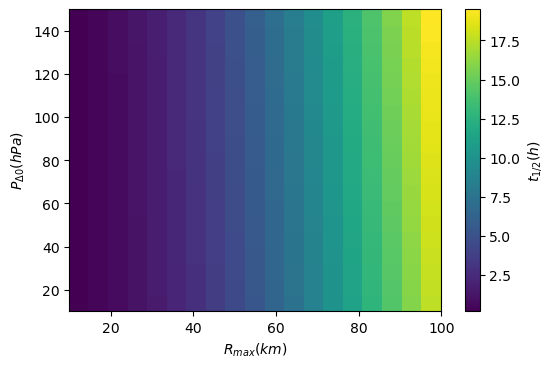

In [73]:
rms=np.linspace(10000,100000,20)
P0s=np.linspace(1000,15000,20)
rmsg,P0sg=np.meshgrid(rms,P0s)
th=((rmsg**2)/(2*a*Pe))*np.log(1+(Pe/(Pe-P0sg)))

fig,ax=plt.subplots(1,1,dpi=100)
pc=ax.pcolormesh(rms/1000,P0s/100,th/(60*60))
ax.set_ylabel('$P_{\Delta0} (hPa)$')
ax.set_xlabel('$R_{max} (km)$')
cb=plt.colorbar(pc)
cb.set_label('$t_{1/2} (h)$')